In [16]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
import matplotlib.pyplot as plt

In [12]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=10000)

In [13]:
max_features = 10000
maxlen = 500
batch_size = 32

In [14]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [15]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 58s 350ms/step - loss: 0.5022 - acc: 0.7576 - val_loss: 0.3547 - val_acc: 0.8540
Epoch 2/10
157/157 [==============================] - 55s 349ms/step - loss: 0.2936 - acc: 0.8863 - val_loss: 0.3714 - val_acc: 0.8520
Epoch 3/10
157/157 [==============================] - 55s 350ms/step - loss: 0.2337 - acc: 0.9116 - val_loss: 0.2853 - val_acc: 0.8810
Epoch 4/10
157/157 [==============================] - 54s 343ms/step - loss: 0.1980 - acc: 0.9267 - val_loss: 0.4111 - val_acc: 0.8312
Epoch 5/10
157/157 [==============================] - 53s 337ms/step - loss: 0.1774 - acc: 0.9358 - val_loss: 0.3173 - val_acc: 0.8736
Epoch 6/10
157/157 [==============================] - 55s 351ms/step - loss: 0.1556 - acc: 0.9437 - val_loss: 0.3444 - val_acc: 0.8808
Epoch 7/10
157/157 [==============================] - 54s 345ms/step - loss: 0.1406 - acc: 0.9495 - val_loss: 0.3441 - val_acc: 0.8884
Epoch 8/10
157/157 [==============================] - 5

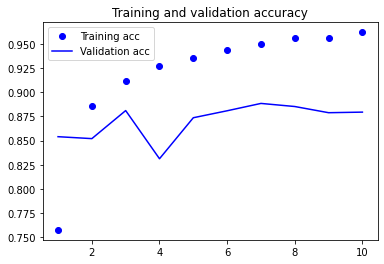

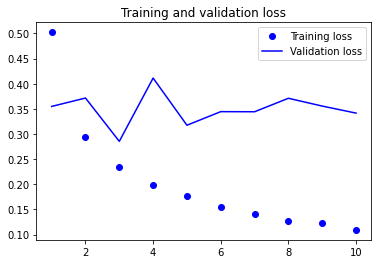

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()